# CNN News Article Text Classification Pipeline

By Abhinav Sikhwal


# Business Objective

This Text Classification Pipeline is performed on the CNN News Articles Dataset. The Dataset contains text from Articles of CNN News Company from 2011 to 2022 and their relevant category and sections for training a Machine Learning Model.

The Dataset has been retrieved from Kaggle - https://www.kaggle.com/datasets/hadasu92/cnn-articles-after-basic-cleaning . 

The objective is to conduct a thorough analysis of the text of all articles in the Dataset, beginning with Cleaning and Preprocessing of the text and Train a Machine learning model to accurately classify the articles into relevant categories based on the content of the text of the article. A model like this can help to classify articles correctly playing an important role in the media management of a News Media Company like CNN. 

# Problem Statement

The Dataset contains text from Articles from 2011 to 2022 and contains articles relating to various subjects like Sports, News, Politics and so on. Since the text columns contains the whole text of each article it can be used to tokenize and train classification algorithms to predict categories. Lets proceed with exploring the dataset. 

# Importing Necessary Libraries 

In [35]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.preprocessing import StandardScaler


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/abhinav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhinav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/abhinav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/abhinav/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Read the Dataset

I will be using pandas to load the dataset obtained from Kaggle.

In [37]:
newdf = pd.read_csv('CNN_Articels_cleaned.csv')

# Data Exploration

In [39]:
# To get a first look of the dataset
newdf.head(10)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,3,Kathryn Vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...
4,4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...
5,5,"Chris Isidore, CNN Business",2022-03-20 11:36:43,business,investing,https://www.cnn.com/2022/03/20/investing/stock...,Stocks week ahead: Big Oil rakes in billions a...,"As crude prices surge, oil companies are rakin...","investing, Stocks week ahead: Big Oil rakes in...",Big Oil rakes in billions as prices soar. Lawm...,A version of this story first appeared in CNN ...
6,6,"Matt Egan, CNN Business",2022-03-18 14:26:26,business,energy,https://www.cnn.com/2022/03/18/energy/oil-russ...,Oil 'emergency': Work from home and drive slow...,Governments around the world must consider dra...,"energy, Oil 'emergency': Work from home and dr...",Oil 'emergency': Work from home and drive slow...,New York (CNN Business)Governments around the ...
7,7,"As told to by Chris Wellisz, International Mon...",2022-03-20 12:57:36,business,perspectives,https://www.cnn.com/2022/03/20/perspectives/im...,Opinion: Technology is transforming the nature...,The convenience of digital payments to both co...,"perspectives, Opinion: Technology is transform...",Technology is transforming the nature of money...,This interview has been edited from its origin...
8,8,"Paul R. La Monica, CNN Business",2022-03-18 17:14:11,business,investing,https://www.cnn.com/2022/03/18/investing/smart...,Inflation is everywhere. Except your cell phon...,"Inflation is everywhere: grocery stores, gas s...","investing, Inflation is everywhere. Except you...",Inflation is everywhere. Except your cell phon...,New York (CNN Business)Inflation is everywhere...
9,9,"Jordan Valinsky, CNN Business",2022-03-18 11:32:30,business,business-food,https://www.cnn.com/2022/03/18/business-food/b...,Burger King partner 'refuses' to close 800 Rus...,Burger King is trying to suspend its operation...,"business-food, Burger King partner 'refuses' t...",Burger King franchise 'refuses' to close 800 R...,New York (CNN Business)Burger King is trying t...


In [40]:
# To check the size of the dataset
newdf.shape

(37949, 11)

In [41]:
# To gather more information about the dataset
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37949 entries, 0 to 37948
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            37949 non-null  int64 
 1   Author           37949 non-null  object
 2   Date published   37949 non-null  object
 3   Category         37949 non-null  object
 4   Section          37949 non-null  object
 5   Url              37949 non-null  object
 6   Headline         37949 non-null  object
 7   Description      37949 non-null  object
 8   Keywords         37949 non-null  object
 9   Second headline  37949 non-null  object
 10  Article text     37940 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.2+ MB


In [42]:
# To check for null values in the dataset
newdf.isna().sum()

Index              0
Author             0
Date published     0
Category           0
Section            0
Url                0
Headline           0
Description        0
Keywords           0
Second headline    0
Article text       9
dtype: int64

In [43]:
# To remove the null values in the Article text column
newdf = newdf.dropna(subset=['Article text'])

In [44]:
newdf.isna().sum()

Index              0
Author             0
Date published     0
Category           0
Section            0
Url                0
Headline           0
Description        0
Keywords           0
Second headline    0
Article text       0
dtype: int64

# Dataset Description

As visible above, This dataset contains 37949 Rows and 11 Columns / Features. The Dataset contains no null values. Aside from the index all other columns are in string format. The dataset is obtained cleaned and contains the follwing features about each article:

The Author Name, Published Date, Category, Section, Headline, Description, Keywords, Second Headline and the Article Text.

Now we can proceed with cleaning and preprocessing the data for machine learning.

# Data Cleaning & Preprocesing

Since the dataset contains articles from 2011 to 2022 - it will be a time consuming process to train the model on the large quantity of data. For this purpose this dataset will be reduced to articles dated 1st January, 2019 onwards and for this the date published column will be converted to date time format. 

Since the data contains 7 categories - news, sport, politics, business, entertainment, health, travel. For the purpose of this pipeline we will be focusing on only the top 3 categories - news, sport and politics. Hence we will be removing the other categories from the dataset. 

In [47]:
# Converting the 'Date Published' column to datetime format
newdf['Date published'] = pd.to_datetime(newdf['Date published'], errors='coerce')

# Filter articles from 2015 onwards
newdf = newdf[newdf['Date published'] >= '2019-01-01']

In [48]:
newdf.shape

(17337, 11)

In [49]:
# Check value counts in the Category column
category_counts = newdf['Category'].value_counts()
print("Category counts:\n", category_counts)

Category counts:
 Category
news             7897
sport            6259
politics         1788
business          808
entertainment     294
health            262
travel             29
Name: count, dtype: int64


In [50]:
# Get the top 3 categories
top_3_categories = category_counts.nlargest(3).index
print(f"Top 3 categories: {top_3_categories}")

# Filter the DataFrame to only include the top 3 categories
newdf = newdf[newdf['Category'].isin(top_3_categories)]

# Check the value counts again to confirm
print("Filtered Category counts:\n", newdf['Category'].value_counts())

Top 3 categories: Index(['news', 'sport', 'politics'], dtype='object', name='Category')
Filtered Category counts:
 Category
news        7897
sport       6259
politics    1788
Name: count, dtype: int64


# Pre-processing Results 

After processing the dataset it is ready for feature Engineering. Now the dataset contains 7897 News Articles, 6259 Sport Articles and 1788 politics articles. The Article Text column will be used to de-noise the data and perform Feature Engineering. 

# Feature Engineering

The text column will be transformed using Re and NLTK library in python. 

These steps will turn the text into lowercase, remove digits and remove any punctuations. 

Furthermore the text will be broken down into sentences and the sentences will be tokenized to obtain word tokens which then will be stemmed and lemmatized. After these functions are applied on the Article text column we will have a dataset which is ready for classification algorithms.

In [53]:
# Function for cleaning text of the Article column
def clean_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\d+', '', text)  # Removing digits
    text = re.sub(r'[^\w\s]', '', text)  # Removing punctuations
    return text

In [54]:
# Function for preprocessing the text  of the Article column
def preprocess_text(text):
    # Sentence segmentation of the Articles
    sentences = sent_tokenize(text)
    # Word tokenization and stop word removal of the Articles
    words = [word_tokenize(sentence) for sentence in sentences]
    stop_words = set(stopwords.words('english'))
    words = [[word for word in sentence if word not in stop_words] for sentence in words]
    # Stemming and lemmatization of the tokens
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    words = [[lemmatizer.lemmatize(stemmer.stem(word)) for word in sentence] for sentence in words]
    return [' '.join(sentence) for sentence in words]

In [55]:
# Applying the text cleaning and preprocessing on the Article Text column
newdf['cleaned_text'] = newdf['Article text'].apply(clean_text).apply(preprocess_text).apply(lambda x: ' '.join(x))

In [56]:
# Converting the target variable (Category) to categorical codes
newdf['target'] = newdf['Category'].astype('category').cat.codes
# Defining the target names to be used while evaluating and predicting
target_names = newdf['Category'].astype('category').cat.categories.tolist()

# Splitting the Dataset

The model will be trained on 80% of the data and 20% will be used for testing the model. For this purpose, train test split from Scikit learn will be used.

In [58]:
# Choosing the cleaned text as X and the categorical codes as the y 
X = newdf['cleaned_text']
y = newdf['target']

In [59]:
# Splitting the dataset in the 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Building

For the purpose of text classification - a Logistic Regression and a Naive Bayes Classifier will be used to train and test the model. 

Both the models will use The TF-IDF vectorizer along with the hyperparameters to transform the text into numerical values identify relationship between tokens and learn to predict categories effectively.

In [61]:
# Defining the pipelines for both the classifiers
pipelines = {
    'LogisticRegression': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression(max_iter=1000)) 
    ]),
    'NaiveBayes': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ])
}

# Hyperparameters

To obtain the best parameters for the model, the grid search technique will be used to train the data and find the best parameters for each model. 

The TF-IDF Max features that are to be tried are 1000, 5000 and 10000. 

The N-gram range that are to be tried are Unigrams and Bi-grams. 

The C value for regularization that are to be tried for Logistic regression are 0.1 , 1 and 10. 

The alpha value for Naive Bayes that are to be tried are 0.1, 0.5 and 1. 


In [63]:
# Tuning the Hyperparameters for gridsearch for both the classifiers
parameters = {
    'LogisticRegression': {
        'tfidf__max_features': [1000, 5000, 10000],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'clf__C': [0.1, 1, 10],
    },
    'NaiveBayes': {
        'tfidf__max_features': [1000, 5000, 10000],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'clf__alpha': [0.1, 0.5, 1.0],
    }
}

# Training and Evaluation 

The Grid Search technique will train the model using the specified parameters and find the best parameters for each model. 

These best parameters will be used to make predictions on the test set and release a classification report of the model which can help to identify the performance metrics of each model and help to choose the best model. 

Thereafter we will look at the Confusion Matrix of the Classifiers and understand the True Labels and Predicted labels for each category. 


Training LogisticRegression...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END clf__C=0.1, tfidf__max_features=1000, tfidf__ngram_range=(1, 1); total time=   4.2s
[CV] END clf__C=0.1, tfidf__max_features=5000, tfidf__ngram_range=(1, 2); total time=  27.9s
[CV] END clf__C=1, tfidf__max_features=1000, tfidf__ngram_range=(1, 1); total time=   5.3s
[CV] END clf__C=1, tfidf__max_features=5000, tfidf__ngram_range=(1, 1); total time=   6.6s
[CV] END clf__C=1, tfidf__max_features=5000, tfidf__ngram_range=(1, 2); total time=  20.4s
[CV] END clf__C=10, tfidf__max_features=1000, tfidf__ngram_range=(1, 2); total time=  22.4s
[CV] END clf__C=10, tfidf__max_features=10000, tfidf__ngram_range=(1, 2); total time=  19.5s
Best parameters found for LogisticRegression:
{'clf__C': 10, 'tfidf__max_features': 10000, 'tfidf__ngram_range': (1, 2)}
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

        news       0.96      0.98      0.9

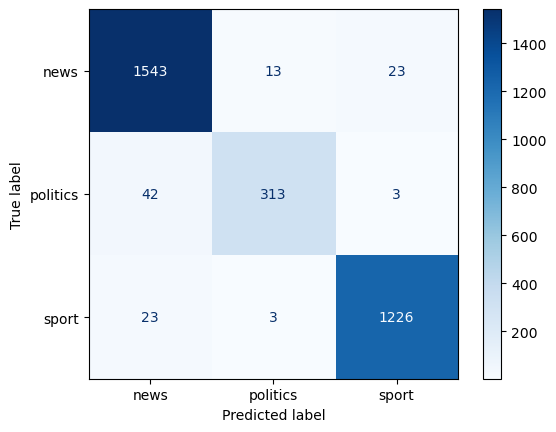

Training NaiveBayes...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END clf__C=0.1, tfidf__max_features=5000, tfidf__ngram_range=(1, 1); total time=   4.7s
[CV] END clf__C=0.1, tfidf__max_features=10000, tfidf__ngram_range=(1, 1); total time=   6.1s
[CV] END clf__C=0.1, tfidf__max_features=10000, tfidf__ngram_range=(1, 1); total time=   7.8s
[CV] END clf__C=0.1, tfidf__max_features=10000, tfidf__ngram_range=(1, 2); total time=  21.2s
[CV] END clf__C=1, tfidf__max_features=5000, tfidf__ngram_range=(1, 2); total time=  21.1s
[CV] END clf__C=10, tfidf__max_features=1000, tfidf__ngram_range=(1, 2); total time=  21.5s
[CV] END clf__C=10, tfidf__max_features=10000, tfidf__ngram_range=(1, 1); total time=  10.0s
[CV] END clf__alpha=0.1, tfidf__max_features=1000, tfidf__ngram_range=(1, 1); total time=   3.6s
[CV] END clf__alpha=0.1, tfidf__max_features=5000, tfidf__ngram_range=(1, 1); total time=   4.0s
[CV] END clf__alpha=0.1, tfidf__max_features=10000, tfidf__ngram_range=

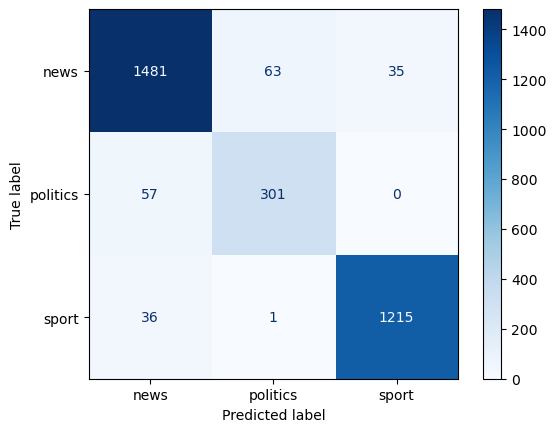

In [65]:
# Training and evaluating both the models
results = {}
for name, pipeline in pipelines.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(pipeline, parameters[name], cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    results[name] = grid_search
    print(f"Best parameters found for {name}:")
    print(grid_search.best_params_)
    
    y_pred = grid_search.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    print(f"\nConfusion Matrix for {name}:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(cmap="Blues")
    plt.show()

# Model Evaluation (Logistic Regression)

For Logistic Regression, we have the follwing best parameters as - 

TF-IDF Max Features = 10000, N-Gram = (1, 2) Bi-grams, Value of C = 10

With these parameters the classification report obtained gives the follwing result - Overall Accuracy: 97%

Precision, Recall, and F1-Score by Category:

News:
Precision: 0.96 -  96% of the articles predicted as "news" are actually "news" articles.
Recall: 0.98 -  98% of the actual "news" articles were correctly identified. 
F1-Score: 0.97 - Harmonic Mean of Precision and Recall
Support

Politics:
Precision: 0.95 - 95% of the articles predicted as "politics" are actually "politics" articles.
Recall: 0.87 - 87% of the actual "politics" articles were correctly identified. 
F1-Score: 0.91 - Harmonic Mean of Precision and Recall

Sport:
Precision: 0.98 - 98% of the articles predicted as "sport" are actually "sport" articles.
Recall: 0.98 - 98% of the actual "sport" articles were correctly identified. 
F1-Score: 0.98 - Harmonic Mean of Precision and Recall

The Confusion Matrix for Naive Bayes explains that- 

News:
Correctly Predicted (True Positives): 1543 Articles
Incorrectly Predicted as Politics (False Negatives): 13 Articles
Incorrectly Predicted as Sport (False Negatives): 23 Articles

Politics:
Correctly Predicted (True Positives): 301 Articles
Incorrectly Predicted as News (False Negatives): 57 Articles
Incorrectly Predicted as Sport (False Negatives): 0 Articles

Sport:
Correctly Predicted (True Positives): 1215 Articles
Incorrectly Predicted as News (False Negatives): 36 Articles
Incorrectly Predicted as Politics (False Negatives): 1 Articles



# Model Evaluation (Naive Bayes Classifier)

For Naive Bayes, we have the follwing best parameters as - 

TF-IDF Max Features = 10000, N-Gram = (1, 2) Bi-grams, Value of alpha = 10

With these parameters the classification report obtained gives the follwing result - Overall Accuracy: 94%

Precision, Recall, and F1-Score by Category:

News:
Precision: 0.94 -  94% of the articles predicted as "news" are actually "news" articles.
Recall: 0.94 -  94% of the actual "news" articles were correctly identified. 
F1-Score: 0.94 - Harmonic Mean of Precision and Recall

Politics:
Precision: 0.82 - 95% of the articles predicted as "politics" are actually "politics" articles.
Recall: 0.84 - 87% of the actual "politics" articles were correctly identified. 
F1-Score: 0.83 - Harmonic Mean of Precision and Recall

Sport:
Precision: 0.97 - 97% of the articles predicted as "sport" are actually "sport" articles.
Recall: 0.97 - 97% of the actual "sport" articles were correctly identified. 
F1-Score: 0.97 - Harmonic Mean of Precision and Recall

The Confusion Matrix for Naive Bayes explains that- 

News:
Correctly Predicted (True Positives): 1481 Articles
Incorrectly Predicted as Politics (False Negatives): 63 Articles
Incorrectly Predicted as Sport (False Negatives): 35 Articles

Politics:
Correctly Predicted (True Positives): 313 Articles
Incorrectly Predicted as News (False Negatives): 42 Articles
Incorrectly Predicted as Sport (False Negatives): 3 Articles

Sport:
Correctly Predicted (True Positives): 1226 Articles
Incorrectly Predicted as News (False Negatives): 23 Articles
Incorrectly Predicted as Politics (False Negatives): 3 Articles


# The Best Model for News Article Classification is Logistic Regression

# Feature Importance

After doing an analysis of the Prediction results, it would be interesting to check the top 10 features for each target category to understand which words each model has associated with its respective category. 

This will be done by using the coefficients of the top 10 words for each category for both the models. For Naive Bayes we will use the feature log. 

In [70]:
# Feature Importance Analysis for both the models
for name, result in results.items():
    print(f"\nTop 10 features for each category in {name}:")
    feature_names = result.best_estimator_.named_steps['tfidf'].get_feature_names_out()

    if name == 'LogisticRegression':
        coefs = result.best_estimator_.named_steps['clf'].coef_
        for idx in range(len(target_names)):
            category = target_names[idx]
            print(f"\nCategory: {category}")
            top_indices = np.argsort(coefs[idx])[-10:][::-1]
            top_features = [feature_names[i] for i in top_indices]
            print(", ".join(top_features))

    elif name == 'NaiveBayes':
        log_probs = result.best_estimator_.named_steps['clf'].feature_log_prob_
        for idx in range(len(target_names)):
            category = target_names[idx]
            print(f"\nCategory: {category}")
            top_indices = np.argsort(log_probs[idx])[-10:][::-1]
            top_features = [feature_names[i] for i in top_indices]
            print(", ".join(top_features))


Top 10 features for each category in LogisticRegression:

Category: news
opinion, cnn opinion, newsletterjoin twitter, newsletterjoin, newslettersign, free weekli, weekli newslettersign, newslettersign cnn, opinion cnn, london

Category: politics
administr, stori updat, white hous, updat addit, democrat, biden, offici, feder, updat, depart

Category: sport
footbal, team, club, player, champion, sport, athlet, leagu, olymp, cnncomsport news

Top 10 features for each category in NaiveBayes:

Category: news
said, polic, peopl, uk, vaccin, countri, govern, state, year, report

Category: politics
trump, biden, republican, democrat, presid, elect, said, hous, vote, state

Category: sport
game, player, team, leagu, win, play, club, world, footbal, sport


# Top 10 Features For Logistic Regression:

News

Important features: opinion, cnn opinion, newsletterjoin twitter, newsletterjoin, newslettersign, free weekly, weekly newslettersign, newslettersign cnn, opinion cnn, london
Indicates focus on opinion pieces, newsletters, and specific mentions of "cnn opinion" and "london." in the articles

Politics

Important features: administration, story update, White House, update addition, democrat, Biden, official, federal, update, department
Highlights the use of administrative and political terminology, with frequent mentions of "Biden," "democrat," and "White House." in the articles

Sport

Important features: football, team, club, player, champion, sport, athlete, league, olympic, cnncomsport news
Emphasizes use of sports-related terms, particularly focusing on "football," "team," and "player." in the articles 




# Top 10 Features For Naive Bayes:

News

Key features: said, police, people, UK, vaccine, country, government, state, year, report
Focuses on general news terms and significant events or entities such as "police," "vaccine," and "government."

Politics

Key features: Trump, Biden, republican, democrat, president, election, said, house, vote, state
Concentrates on political figures and events, prominently featuring "Trump," "Biden," and "election."

Sport

Key features: game, player, team, league, win, play, club, world, football, sport
Similar to Logistic Regression, it highlights sports-related terms with an emphasis on "game," "player," and "team."



# Final Results

The Best Model for this task is the Logistic regression model. It Helps to correctly identify words and patterns and classify articles based on Natural Language Processing (NLP).

The Logistic regression model has high precision and recall for the "news" and "sport" categories, as shown by the high number of true positives and low number of false negatives in the matrix. However, the "politics" category has a slightly lower recall, indicated by a higher number of articles that are "politics" but are incorrectly classified as "news" or "sport." This indicates that the model occasionally misses "politics" articles, classifying them as "news" or "sport" instead. 



# Conclusion 

Logistic Regression and Naive Bayes both models analyze text data to identify important features across different categories og the News Articles.


Logistic Regression in news category focuses on opinions and specific entities like "cnn opinion" and "London."

Naive Bayes in news category captures general terms such as "police," "vaccine," and "government."

Both models agree on the importance of political figures like "Trump" and "Biden," and sports terms such as "football," "team," and "player."

